In [ ]:
#PLOT

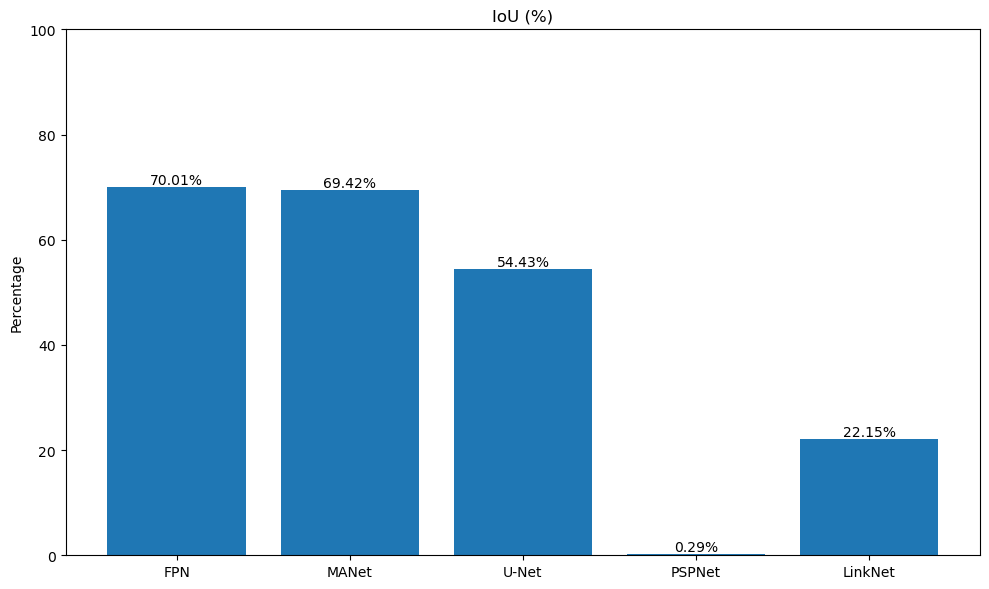

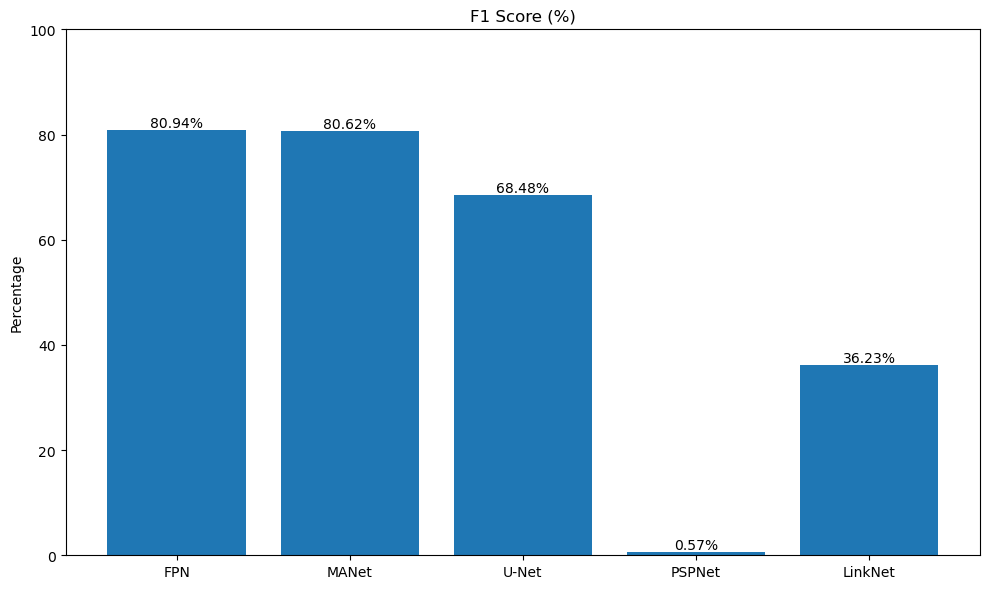

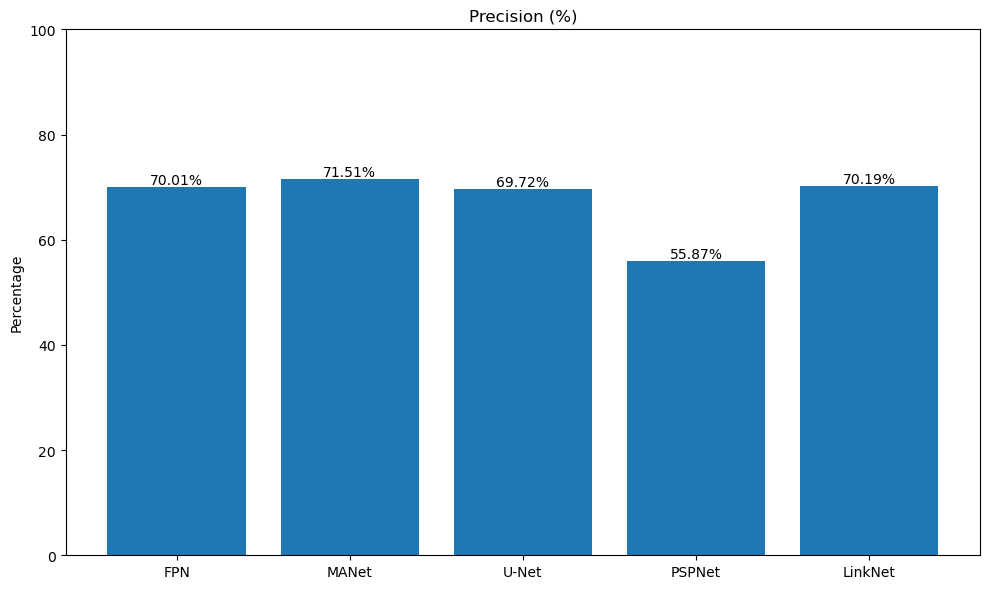

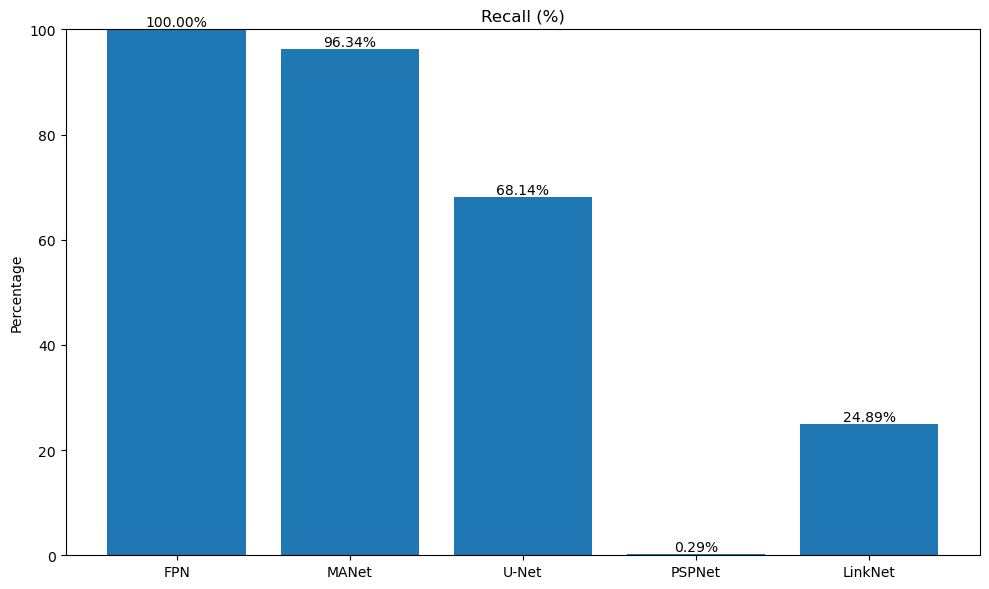

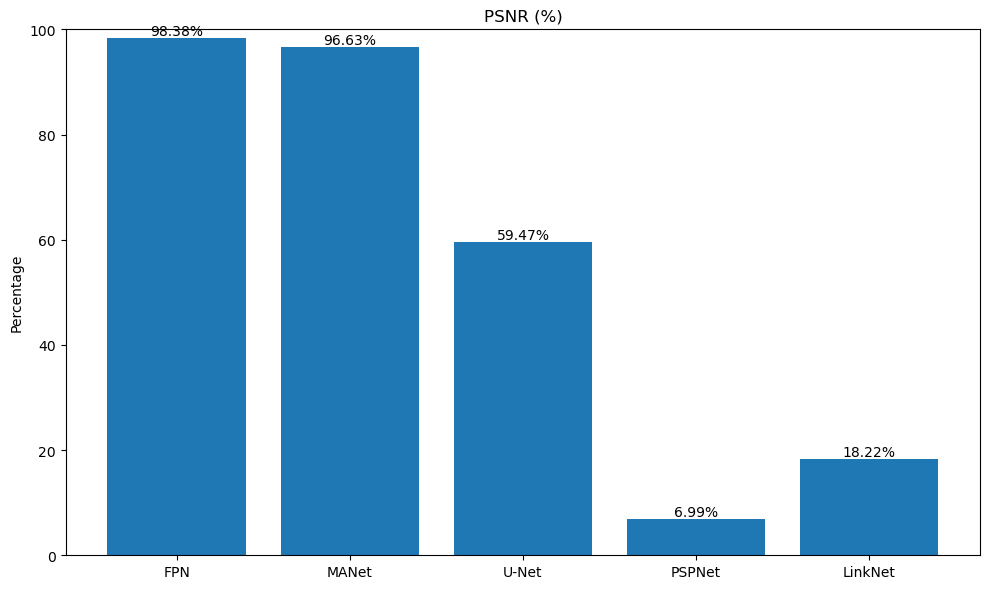

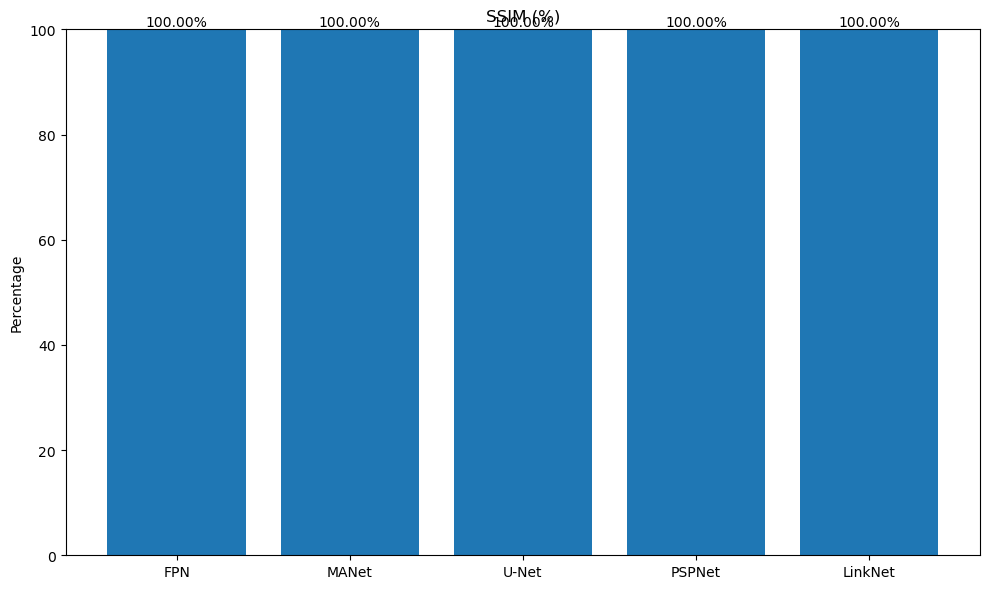

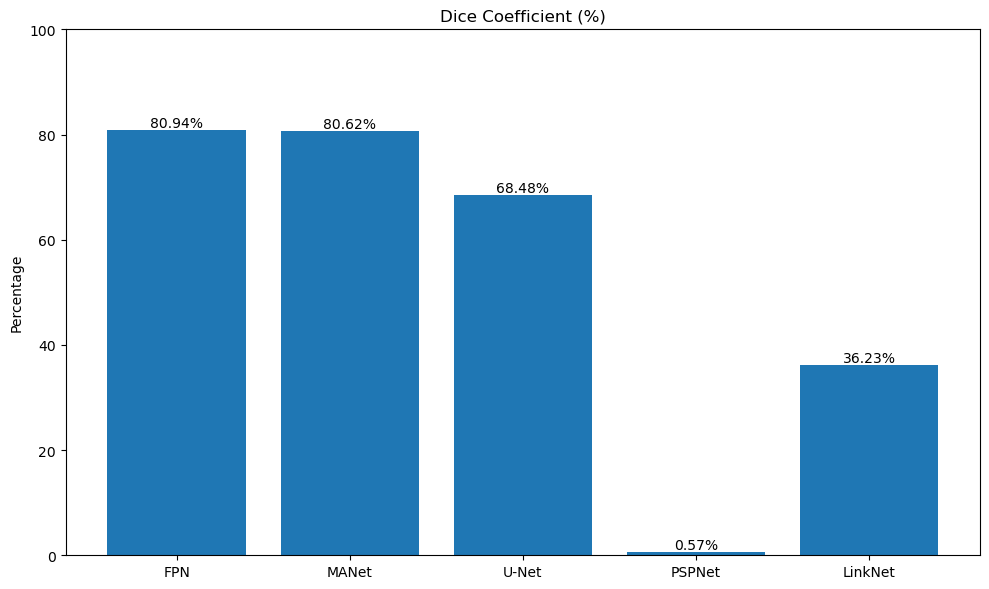

Percentage Data:
FPN: [ 70.01   80.94   70.01  100.     98.384 100.     80.94 ]
MANet: [ 69.42  80.62  71.51  96.34  96.63 100.    80.62]
U-Net: [ 54.43   68.48   69.72   68.14   59.472 100.     68.48 ]
PSPNet: [  0.29    0.57   55.87    0.29    6.992 100.      0.57 ]
LinkNet: [ 22.15  36.23  70.19  24.89  18.22 100.    36.23]


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['FPN', 'MANet', 'U-Net', 'PSPNet', 'LinkNet']
metrics = ['IoU', 'F1 Score', 'Precision', 'Recall', 'PSNR', 'SSIM', 'Dice Coefficient']

data = np.array([
    [0.7001, 0.8094, 0.7001, 1.0000, 192.9192, 1.0, 0.8094],
    [0.6942, 0.8062, 0.7151, 0.9634, 192.8315, 1.0, 0.8062],
    [0.5443, 0.6848, 0.6972, 0.6814, 190.9736, 1.0, 0.6848],
    [0.0029, 0.0057, 0.5587, 0.0029, 188.3496, 1.0, 0.0057],
    [0.2215, 0.3623, 0.7019, 0.2489, 188.9110, 1.0, 0.3623]
])

# Convert to percentages
data_percent = data.copy()
data_percent[:, :4] *= 100  # IoU, F1 Score, Precision, Recall
data_percent[:, 4] = (data_percent[:, 4] - 188) / (193 - 188) * 100  # PSNR
data_percent[:, 5] *= 100  # SSIM
data_percent[:, 6] *= 100  # Dice Coefficient

# Plotting function
def plot_metric(metric_index, metric_name):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(models, data_percent[:, metric_index])
    plt.title(f'{metric_name} (%)')
    plt.ylabel('Percentage')
    plt.ylim(0, 100)
    
    # Add value labels on the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Generate plots for each metric
for i, metric in enumerate(metrics):
    plot_metric(i, metric)

# Print the percentage data
print("Percentage Data:")
for i, model in enumerate(models):
    print(f"{model}: {data_percent[i]}")

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['U-Net', 'PSPNet', 'FPN', 'LinkNet', 'MANet']
metrics = {
    'IoU': [0.4253, 0.2212, 0.6373, 0.1863, 0.0775],
    'F1 Score': [0.5599, 0.3451, 0.7238, 0.3095, 0.1406],
    'Precision': [0.7208, 0.7048, 0.7143, 0.7123, 0.7359],
    'Recall': [0.5300, 0.3053, 0.8716, 0.2359, 0.0842],
    'PSNR': [382.8118, 381.5486, 385.8368, 381.7352, 381.9626],
    'SSIM': [1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
    'Dice Coefficient': [0.5599, 0.3451, 0.7238, 0.3095, 0.1406]
}

# Create a plot for each metric
for metric, values in metrics.items():
    plt.figure(figsize=(10, 6))
    bars = plt.bar(models, values)
    plt.title(f'{metric} Comparison')
    plt.xlabel('Models')
    plt.ylabel(metric)
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.4f}',
                 ha='center', va='bottom')
    
    plt.ylim(0, max(values) * 1.1)  # Set y-axis limit to 110% of max value
    plt.tight_layout()
    plt.savefig(f'{metric.lower().replace(" ", "_")}_comparison.png')
    plt.close()

# Create a single plot comparing all metrics (except PSNR and SSIM due to scale differences)
metrics_to_plot = ['IoU', 'F1 Score', 'Precision', 'Recall', 'Dice Coefficient']
x = np.arange(len(models))
width = 0.15

fig, ax = plt.subplots(figsize=(12, 6))

for i, metric in enumerate(metrics_to_plot):
    ax.bar(x + i*width, metrics[metric], width, label=metric)

ax.set_ylabel('Score')
ax.set_title('Comparison of Metrics Across Models')
ax.set_xticks(x + width * 2)
ax.set_xticklabels(models)
ax.legend(loc='best')
ax.set_ylim(0, 1)

plt.tight_layout()
plt.savefig('all_metrics_comparison.png')
plt.close()

print("All plots have been saved as PNG files.")

All plots have been saved as PNG files.
